In [32]:
import cv2
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

#Define the folder path containing the images
folder_path = 'C:/Users/hiccu/Downloads/ImageTraining'

In [33]:
imageFoldersArray = {
    "Bananas",
    "BlueMorph",
    "Strawberry",
    "BostonTerrier",
    "Koalas",
    "MariposaMonarca",
    "Pinguinos",
    "Icebergs",
    "Montanas"
}


In [34]:
#Initialize an empty list to store the results
results = []
    
for image_folder in imageFoldersArray:
    
    images_path = folder_path + '/' + image_folder
    print(images_path)  

    for filename in os.listdir(images_path):
        #Ignore any non-image files
        if not filename.endswith(".jpg") and not filename.endswith(".png"):
            continue

        #Load the image using OpenCV (BGR)
        image = cv2.imread(os.path.join(images_path, filename),cv2.IMREAD_COLOR)
                             
        #Calculate the percentage of each color channel
        #b,g,r = cv2.split(image)
        #total_values = np.sum(b) + np.sum(g) + np.sum(r)
        #blue_percent = (np.sum(b) / total_values) * 100
        #green_percent = (np.sum(g) / total_values) * 100
        #red_percent = (np.sum(r) / total_values) * 100
        
        #Get the rgb channels from the image
        b_channel = image[:, :, 0]
        g_channel = image[:, :, 1]
        r_channel = image[:, :, 2]
        
        #Get histograms from color channels
        b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])
        g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
        r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
        
        #Convert the image to grayscale
        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.imread(os.path.join(images_path, filename),cv2.IMREAD_GRAYSCALE)
        mean, std = cv2.meanStdDev(gray_image)
        
        #Create histogram
        gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        
        #Calculate the average brightness of the grayscale image
        #gray_brightness = cv2.mean(gray_image)[0] * 100 / 255

        #Add the results to the list
        results.append([filename, r_hist, g_hist, b_hist, gray_hist, mean[0][0], std[0][0]])

C:/Users/hiccu/Downloads/ImageTraining/MariposaMonarca
C:/Users/hiccu/Downloads/ImageTraining/Pinguinos
C:/Users/hiccu/Downloads/ImageTraining/Icebergs
C:/Users/hiccu/Downloads/ImageTraining/Koalas
C:/Users/hiccu/Downloads/ImageTraining/Strawberry
C:/Users/hiccu/Downloads/ImageTraining/Montanas
C:/Users/hiccu/Downloads/ImageTraining/BlueMorph
C:/Users/hiccu/Downloads/ImageTraining/BostonTerrier
C:/Users/hiccu/Downloads/ImageTraining/Bananas


In [35]:
#Write the results to a csv file
with open("rgb_percentages.csv", "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Filename", "Red Histogram", "Green Histogram", "Blue Histogram","Gray Brightness", "Mean", "Standard Deviation"])
    for result in results:
        writer.writerow(result)

In [36]:
#Select desired image to display (based on csv row number)
tuple_index = 590
filename, r_hist, g_hist, b_hist, gray_hist, mean, std = results[tuple_index-2]

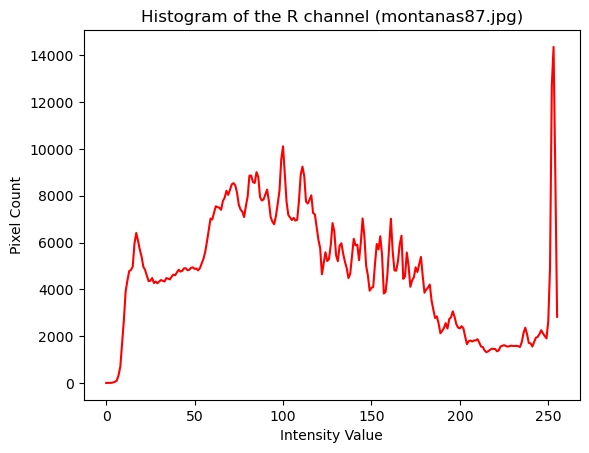

In [37]:
plt.plot(r_hist, color='r')
plt.title(f'Histogram of the R channel ({filename})')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

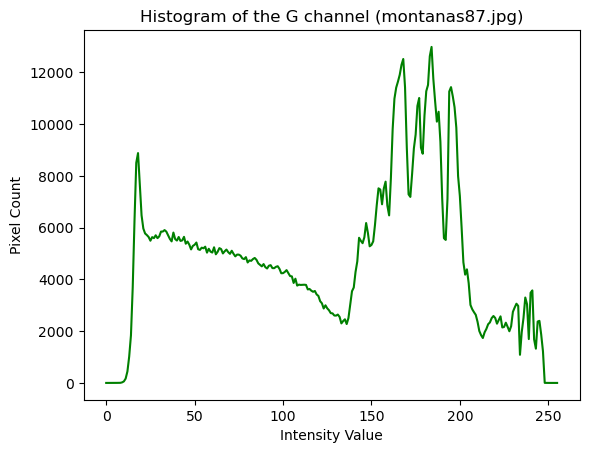

In [38]:
plt.plot(g_hist, color='g')
plt.title(f'Histogram of the G channel ({filename})')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

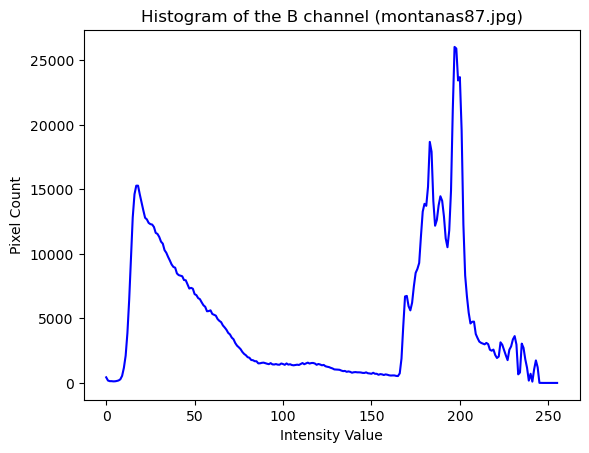

In [39]:
plt.plot(b_hist, color='b')
plt.title(f'Histogram of the B channel ({filename})')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

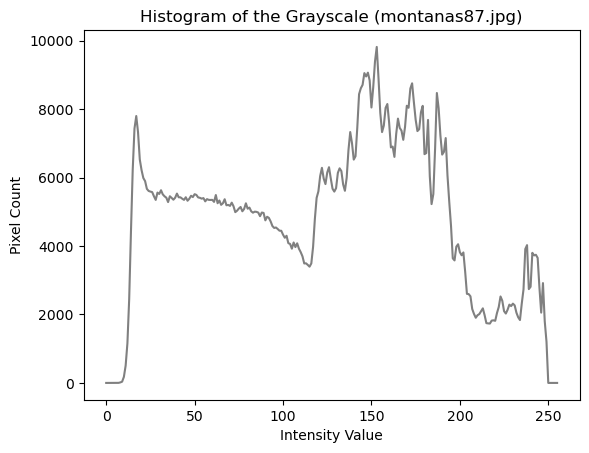

In [40]:
plt.plot(gray_hist, color='gray')
plt.title(f'Histogram of the Grayscale ({filename})')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()